In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pca.examples import color
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df=pd.read_csv(r"D:\Cases\Wisconsin\BreastCancer.csv",index_col=0)
df.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [4]:
X,y=df.drop('Class',axis=1),df['Class']

## PCA

<Axes: xlabel='pca0', ylabel='pca1'>

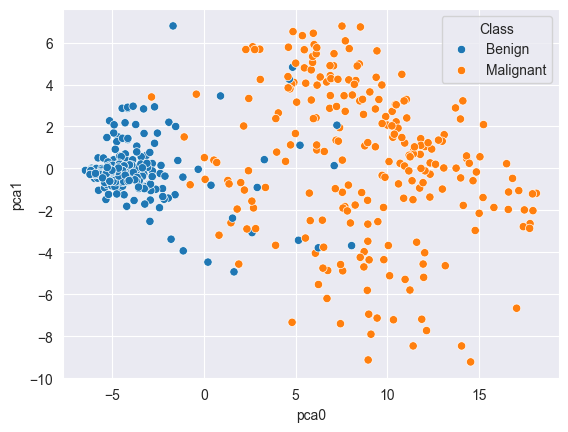

In [5]:
pca=PCA().set_output(transform='pandas')
X_pca=pca.fit_transform(X)
pc_data=X_pca.copy()
pc_data['Class']=y
sns.scatterplot(data=pc_data,x='pca0',y='pca1',hue='Class')

## TSNE

<Axes: xlabel='tsne0', ylabel='tsne1'>

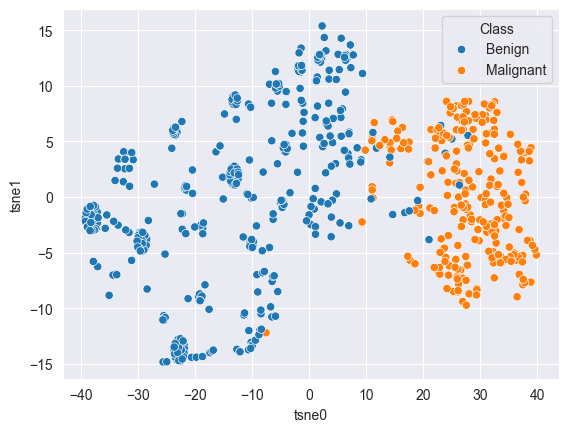

In [7]:
tsne=TSNE(random_state=25).set_output(transform='pandas')
tsne_data=tsne.fit_transform(X)
tsne_data['Class']=y
sns.scatterplot(data=tsne_data,x='tsne0',y='tsne1',hue="Class")

## Time series Analysis

In [12]:
import matplotlib.pyplot as plt
import ipywidgets as widget
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt # For the model
from sklearn.metrics import root_mean_squared_error # For RMSE calculation

In [8]:
df = pd.read_csv(r"D:\Datasets\monthly-milk-production-pounds-p.csv")
df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [10]:
y_train=df["Milk"].iloc[:-12]
y_test=df['Milk'].iloc[-12:]

In [15]:
def hw(alpha,beta,gamma,season_type,periods):
    holt=ExponentialSmoothing(y_train,trend='add',seasonal=season_type,seasonal_periods=periods)
    fit1=holt.fit(smoothing_level=alpha,smoothing_seasonal=gamma,smoothing_trend=beta)
    fcast1=fit1.forcast(len(y_test))
    y_test.plot(color='pink',label='test')
    fcast1.plot(color='purple',labeel='forcast')
    rsme=root_mean_squared_error(y_test,fcast1)
    plt.title(f"RMSE={rsme:.2f},alpha={alpha:.2f},beta={beta:.2f},gamma={gamma:.2f}")
    plt.legend(loc='best')
    plt.show()

widget.interact(hw,alpha=(0.01,1,0.01),beta=(0.01,1,0.01),gamma=(0.01,1,0.01),
                seasonality=['add','mul'])

ValueError: cannot find widget or abbreviation for argument: 'season_type'

In [11]:
! pip install statsmodels ipywidgets

  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.8-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl (914 kB)
Using cached widgetsnbextension-4.0.15-py3-none-any.whl (2.2 MB)

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]

